# Projeto Clusterização

Objetivo: Dividir os clientes em N grupos, em que possuam características em comum quando a clientes de crédito

In [ ]:
import pandas as pd

dataframe = pd.read_csv('/content/drive/MyDrive/projetos/projetos-clusterizacao/CC GENERAL.csv')
dataframe.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# Parametro inplace utilizado para dizer que não precisa salvar esse passo em variável nenhuma, ja fica salvo na mesma variável utilizada anteriormente
dataframe.drop(columns = ['CUST_ID', 'TENURE'], inplace = True)
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


Avaliando dados faltantes

In [ ]:
missing = dataframe.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

Para tratar valores nulos, possuem variás técnicas, seja remover, preencher com a média... Nesse caso iremos preencher com a mediana

In [ ]:
dataframe.fillna(dataframe.median(), inplace = True)
missing = dataframe.isna().sum()
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

Realizando a normalização dos dados. Lembrando que na clusterização o algoritmo não roda com variáveis categóricas, além disso, é muito importante normaliza-lo ou então padroniza-lo para que ele obtenha um resultado satisftório, pois como esse tipo de algoritmo trabalha com as distâncias entre pontos, se elas não tiverem a mesma escala o modelo dará peso maior para variáveis com o valor bruto maior

In [ ]:
from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(dataframe.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, n_init = 10, max_iter = 300)
y_pred = kmeans.fit_predict(values)

In [ ]:
from sklearn import metrics

labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric = 'euclidean')
silhouette

0.3644845919974304

Como o valor do coeficiente é maior que zero, pordemos considerar esse valor como bom (quanto maior ele, melhor)

------------------------------------------------------

Agora iremos avaliar por outra métrica que utiliza o cálculo de Davies-Bouldin

In [ ]:
dbs = metrics.davies_bouldin_score(values, labels)
dbs

1.0757138590613295

Lembrando que para essa métrica do Davies-Bouldin, quanto mais próximo de zero, melhor

--------------------------------------------------

Agora iremos avaliar por outra métrica que utiliza o cálculo de Calinski (quanto maior seu valor, melhor)

In [ ]:
calinski = metrics.calinski_harabasz_score(values, labels)
calinski

3431.7937428414293

Realizando a validação relativa para saber se esses valores das variáveis que calculamos está adequado:

In [ ]:
def clustering_algorithm(n_clusters, dataset): # Dentro do parentênteses, estão o que a função recebe de entrada
  kmeans = KMeans(n_clusters = n_clusters, n_init = 10, max_iter = 300)
  labels = kmeans.fit_predict(dataset)
  s = metrics.silhouette_score(dataset, labels, metric = 'euclidean')
  dbs = metrics.davies_bouldin_score(dataset, labels)
  calinski = metrics.calinski_harabasz_score(dataset, labels)
  return s, dbs, calinski

In [ ]:
s, dbs, calinski = clustering_algorithm(3, values) # Dentro do parentênteses, estão o que a função retorna na saída da chamada da função
s, dbs, calinski

(0.3271876117023111, 1.3097277155134848, 3526.4611891060927)

In [ ]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
s2, dbs2, calinski2

(0.36443927743081506, 1.0758787031571042, 3431.782548172111)

In [ ]:
s3, dbs3, calinski3 = clustering_algorithm(50, values)
s3, dbs3, calinski3

(0.23655344325308802, 1.2287424304702035, 1610.396934084977)

In [ ]:
dataframe.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

Escolheremos o resultado com 5 clusters, visto que o valor de Silhouette geralmente é o mais importante (o que é levado mais em consideração), e para o de 5 clusters ele teve o melhor desempenho. Além disso, os outros parâmetros não tiveram tanta variação

--------------------------------------------------

Outra forma de validação é comparar os valores que obtemos do nosso dataset com outros de um banco de dados aleatório. A ideia é que possamos garantir que nosso conjunto de dados apresente melhores métricas, e por conseguinte, uma estrutura capaz de ser clusterizada.

Para isso, geraremos um conjunto de dados aleatório com valores entre 0 e 1, que são os valores que temos. Utilizaremos a mesma quantidade de variáveis, isto é, 16, e a mesma quantidade de instâncias.

Foi criado um dataframe (fictício) com valores aleatórios de 0 a 1, para serem comparados com os valores do dataframe oficial (que também varia de 0 a 1)

In [ ]:
import numpy as np
# Criando um dataframe com valores aleatórios
random_data = np.random.rand(8950, 16) # (número de linhas, número de variáveis)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski) # Resultado utilizando 5 clusters com o dataframe(random_data)
print(s2, dbs2, calinski2) # Resultado utilizando 5 clusters com o dataframe(values)

0.03970658587688142 3.4809125116913675 303.98571946179914
0.36443927743081506 1.0758787031571042 3431.782548172111


Validando a estabilidade do Cluster:

Nosso próximo passo é validar a estabilidade do cluster. A ideia é que dividamos a base de dados e executemos o kmeans para cada uma dessas divisões a fim de obtermos resultados similares para as métricas, pois queremos que o kmeans se comporte similarmente em cada uma para conseguirmos a validação.

In [ ]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36897094584161894 1.0581656052369077 1204.0560966145404
0.35416642754504835 1.1382306445993162 1194.951986504888
0.36704188760608253 1.0984932613776763 1167.5309516804004


Teremos valores parecidos nas três colunas e com as métricas diferentes, isso indica que nosso cluster é válido.

---------------------------------------------------

Interpretando os Clusters:

<function matplotlib.pyplot.show(*args, **kw)>

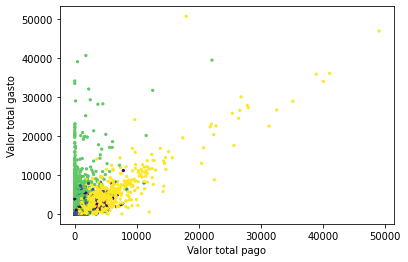

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c = labels, s=5)
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")
plt.show

In [ ]:
import seaborn as sns
dataframe['cluster'] = labels
#sns.pairplot(dataframe[0:], hue = 'cluster')

Plotando esses gráficos, conseguimos perceber que nem sempre por visualização conseguimos interpretar os nossos Clusters, muito dos casos, por terem muitas informações, e ficar impossível de avaliar apenas olhando para gráficos. Por esse motivo são usadas outras técnicas

In [ ]:
dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
1        3278.0   443.992358   846.597972   0.000000    23.315538   
2         411.0  1987.501586  1854.459156  70.794108  1018.958891   
3        1072.0  1794.024195  1982.950586   0.000000   506.925348   
4        1540.0  1142.222657  1664.035755   0.000000   211.566656   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        2174.018945  4223.867789  18495.558550            2649.0  0.963740   
1          82.992153   411.193793   9630.367575            3278.0  0.774417   
2        1337.287314  2138.678431  11670.179850             411.0  0.989486   
3        1087.920500  2308.762488  14581.459140            1072.0  0.862131   
4         554.332740  1370.859355  19043.138560            1540.0  0.928053   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...      1330.593643   8345.641905           2649.0  0.001799   
1        ...       248.800040   4483.503862           3278.0  0.246549   
2        ...      7112.618584  76406.207520            411.0  0.019318   
3        ...       884.718306  21235.065300           1072.0  0.117384   
4        ...       524.184580  18621.013310           1540.0  0.278582   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.023260  0.0  0.0  0.000000  0.000000  0.6  
1        0.346601  0.0  0.0  0.000000  0.444444  1.0  
2        0.090901  0.0  0.0  0.000000  0.000000  1.0  
3        0.186853  0.0  0.0  0.083333  0.142857  1.0  
4        0.367203  0.0  0.0  0.083333  0.545455  1.0  

[5 rows x 128 columns]

Análise visual fica inviável, mesmo olhando esses atributos...

In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[5.04263792e-01, 2.72194282e-04, 6.17808431e-02, 3.62269020e-02,
        2.55756543e-02, 2.52903017e-01, 6.73170559e-05, 2.56975193e-05,
        4.50651626e-05, 5.74388410e-05, 1.15687334e-03, 1.33194105e-03,
        7.19174706e-01, 1.66205262e-01, 1.79245673e-01, 5.52303554e-07],
       [6.91386971e-02, 2.30552524e-04, 1.21267798e-01, 4.80255998e-02,
        7.33425496e-02, 2.43607736e-02, 1.72581896e-04, 3.37097813e-05,
        1.40021986e-04, 7.93309218e-06, 1.24113667e-04, 2.86037895e-03,
        9.43728649e-01, 1.53557708e-01, 5.68217245e-02, 7.57977264e-05],
       [3.32918803e-01, 2.68423552e-04, 1.58240376e-01, 3.63059801e-02,
        1.22319068e-01, 5.83557153e-02, 1.66754597e-04, 2.64938445e-05,
        1.47063187e-04, 1.93217566e-05, 4.27934836e-04, 3.86197017e-03,
        3.76718873e-01, 2.51861450e-01, 6.80311114e-01, 4.23993819e-06],
       [2.35141479e-01, 2.16555293e-04, 6.03857074e-02, 3.44170171e-02,
        2.59739049e-02, 4.00128071e-01, 5.26401668e-05, 2.048

In [ ]:
# Calculando a variância de cada cluster para cada Atributo
max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0196
ONEOFF_PURCHASES 
0.0076
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0543
PRC_FULL_PAYMENT 
0.0000


Teremos como resultado a variância para cada um dos dezesseis atributos, então podemos selecionar visualmente qual será utilizado para nossa análise, pois ficou bem mais simples.

Selecionamos os atributos BALANCE, PURCHASES, CASH_ADVANCE, CREDIT_LIMIT, PAYMENTS e MINIMUM_PAYMENTS, que são aqueles que possuem apenas um zero após a vírgula. OS colocaremos lado a lado na célula seguinte como apenas conteúdo markdown.

BALANCE 0.0224
PURCHASES 0.0196
CASH_ADVANCE 0.0226
CREDIT_LIMIT 0.0360
PAYMENTS 0.0280
MINIMUM_PAYMENTS 0.0542

Vamos relembrar o que cada um desses atributos representa para verificar se de fato faz sentido que eles sejam analisados em conjunto.

BALANCE = limite disponível do cliente
PURCHASES = valor total de compras
CASH_ADVANCE = valor total de saques
CREDIT_LIMIT = limite total de crédito
PAYMENTS = valor total pago
MINIMUM_PAYMENTS = o mínimo pago
O último atributo MINIMUM_PAYMENTS não nos interessa pois não trará muitos benefícios para a interpretação, então o removeremos da lista.

Dessa forma, temos cinco atributos a serem utilizados para a análise detalhada dos clusters.

In [ ]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        3037.962543   385.248630   1636.917210   4495.771989   968.890376   
1         443.992358   629.345171    141.569301   5132.945933   814.477150   
2        1987.501586   854.865815    421.129352   2227.737226  1336.238911   
3        1794.024195   475.494823   3270.246792   3976.372399  4709.556601   
4        1142.222657  3268.886929    183.019398   4097.701397  3037.241495   

         n_clients  
cluster             
0             2649  
1             3278  
2              411  
3             1072  
4             1540  


<ipython-input-79-09694d8613d0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


Agora começando as interpretações: geralmente começamos pegando os valores extremos.

---------------------------------------------------

Abaixo analisaremos cada Atributo e seus valores calculados

CLUSTER 0: Clientes que mais gastam. O foco deles é o saque.
CLUSTER 1: Clientes que gastam pouco. Clientes com o maior limite.
CLUSTER 2: Clientes com o menor limite.
CLUSTER 3: Clientes que gastam muito com saques
CLUSTER 4: Clientes que gastam muito com compras.

---------------------------------------------------

Para saber dados mais precisos sobre pagamentos, olharemos o "BALANCE" e utilizaremos um atributo que não foi o selecionado previamente, mas que se relacionam.

Vemos que o pagamento está maior do que o gasto no cluster 0, mas lembramos que há vários elementos no grupo e estamos lidando com médias, portanto não conseguiremos um valor que reflita fielmente a relação de valor gasto com pagamento.

Já no cluster 1, conseguiríamos supor que os clientes que estão devendo aproximadamente três mil e pagaram apenas novecentos, porém não temos certeza.

Como esta análise não fica tão clara, buscaremos o atributo "PRC_FULL_PAYMENT", que indica o percentual de pagamento realizado pelo cliente.

In [ ]:
dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,2649.0,0.001799,0.023260,0.0,0.0,0.000000,0.000000,0.6
1,3278.0,0.246549,0.346601,0.0,0.0,0.000000,0.444444,1.0
2,411.0,0.019318,0.090901,0.0,0.0,0.000000,0.000000,1.0
3,1072.0,0.117384,0.186853,0.0,0.0,0.083333,0.142857,1.0
4,1540.0,0.278582,0.367203,0.0,0.0,0.083333,0.545455,1.0


CLUSTER 0: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.

---------------------------------------------------

CLUSTER 1: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior número de clientes.

---------------------------------------------------

CLUSTER 2: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.

---------------------------------------------------

CLUSTER 3: Clientes que gastam muito com saques. Pagam as vezes

---------------------------------------------------

CLUSTER 4: Clientes que gastam muito com compras. Melhores pagadores.

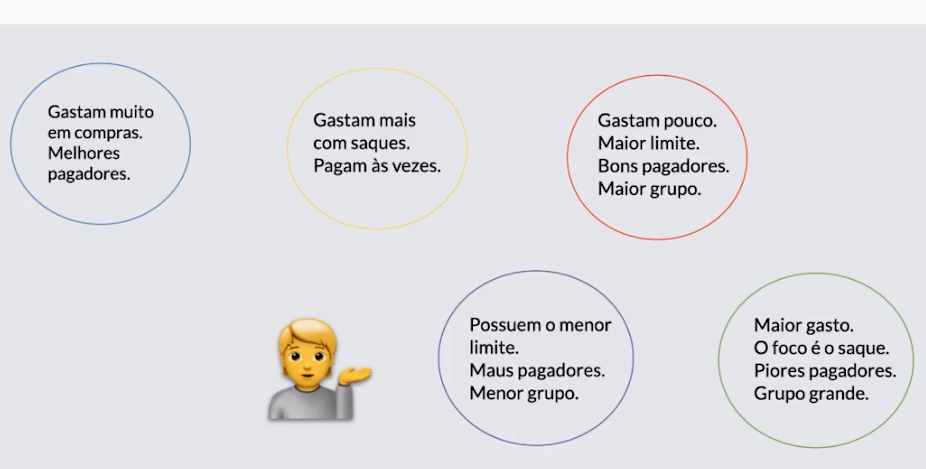

Qual o comportamento dos meus clientes com o cartão de crédito?
E ao final de todo o projeto, vimos que nosso objetivo foi atingido, dividimos nossos clientes em 5 grupos que possuem as características descritas pela imagem acima.